In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect("../unified_CD2.db")
cur = con.cursor()

df = pd.read_sql_query("SELECT * FROM prod_desc", con)
df['AB'] = df['AB'].apply(lambda x: int.from_bytes(x, "little"))
df

,index,id,name,AB,description,OX,source,seq,valid,MaxAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.0,ADAM_2177,InverPep_ADAM_2177,1,None,alien,InverPep.fasta,GLFNVFKGLKTAGKHVAGSLLNQLKCKVSGGC,yes,14.846797,...,0,0,0,0,0,0,0,0,5,0
1,NaN,P85444,PPIA_PENGL,0,Peptidyl-prolyl cis-trans isomerase (Fragment),Penicillium glabrum OX=69773,uniprot_swissprot.fasta,KFADENFQLKH,yes,14.574620,...,0,0,0,0,0,0,0,0,2,0
2,NaN,P85445,ATPD_PENGL,0,"ATP synthase subunit delta, mitochondrial (Fra...",Penicillium glabrum OX=69773 GN=atp16,uniprot_swissprot.fasta,KIANGSGSEQDIAEAKI,yes,14.109537,...,0,0,0,0,0,0,0,0,2,0
3,NaN,P85448,FAR1_LUCCU,0,FMRFamide-1,Lucilia cuprina OX=7375,uniprot_swissprot.fasta,SVQDNFIRF,yes,14.458228,...,0,0,0,0,0,0,0,0,1,0
4,NaN,P85450,FAR3_LUCCU,0,FMRFamide-3,Lucilia cuprina OX=7375,uniprot_swissprot.fasta,SANTKNDFMRF,yes,14.493044,...,1,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12796,NaN,A0A286YD83,SIM43_MOUSE,0,Small integral membrane protein 43,Mus musculus OX=10090 GN=Smim43,uniprot_swissprot.fasta,MEWKLNLLLYLALFFFLLFLLFLLLFVVIKQLKNSVANTAGTLQPG...,yes,16.078441,...,1,0,0,0,0,0,0,0,5,0
12797,NaN,A0A2I8B346,AMP1_PARCM,0,Paralithocin 1,Paralithodes camtschaticus OX=6741,uniprot_swissprot.fasta,MGPMKVLLVLLVVMVAAPHIADAWQQPSCSSICDYSCGKSACISYS...,yes,15.339288,...,3,0,0,0,0,0,0,0,5,0
12798,NaN,A0A2L1DGG0,HSTX1_HAESL,0,Peptide HSTX-I,Haemadipsa sylvestris OX=13555,uniprot_swissprot.fasta,MRTLLVFLLLAIFVAVLIGNVQVEAACKEYWECGAFLFCIEGICVPMIG,yes,15.662066,...,2,0,0,0,0,0,0,0,2,0
12799,NaN,A0A348G5W0,TX14A_ODOMO,0,U-poneritoxin(01)-Om4a,Odontomachus monticola OX=613454,uniprot_swissprot.fasta,MKPSSLTLAFLVVFMMAIMYNSVQAEALADADAEAFAEAGVKELFG...,yes,15.476384,...,4,0,0,0,0,0,0,0,7,0


# Logistic regression

c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:86: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


Accuracy: 0.72
Confusion Matrix:
[[ 831  343]
 [ 383 1004]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1174
           1       0.75      0.72      0.73      1387

    accuracy                           0.72      2561
   macro avg       0.71      0.72      0.72      2561
weighted avg       0.72      0.72      0.72      2561



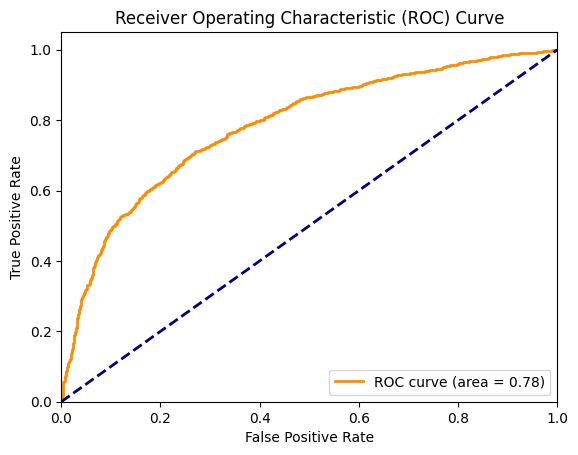

Feature Importance:
                      Feature  Importance
67                   SMR_VSA6    3.009758
101               VSA_EState6    2.352352
99                VSA_EState4    1.553618
57                  PEOE_VSA6    1.541467
123                   MolLogP    1.172366
18                BCUT2D_MWHI    1.110216
15           FpDensityMorgan1    1.019725
87                EState_VSA2    0.983789
22              BCUT2D_LOGPHI    0.948956
147                     fr_SH    0.847663
78                 SlogP_VSA5    0.822269
28                    BertzCT    0.691700
118         NumRotatableBonds    0.686068
58                  PEOE_VSA7    0.601777
168                fr_guanido    0.584729
63                   SMR_VSA2    0.584729
3              MinEStateIndex    0.536954
88                EState_VSA3    0.521572
172              fr_imidazole    0.519955
130                   fr_Ar_N    0.485760
55                  PEOE_VSA4    0.485544
74                SlogP_VSA12    0.485544
90            

In [13]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line if you need to load your data

# Step 2: Replace all missing values with 0
df.fillna(0, inplace=True)

# Step 3: Drop all columns with non-numeric contents
df_numeric = df.select_dtypes(include=[np.number]).drop('index', axis=1, errors='ignore')

# Step 4: Replace infinities and NaNs resulting from any prior transformations with finite numbers
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
df_numeric.fillna(0, inplace=True)

# Step 5: Ensure the target variable is binary
if df_numeric['AB'].nunique() != 2:
    raise ValueError("The target variable 'AB' should be binary for logistic regression.")

# Step 6: Prepare the data by separating features and target
X = df_numeric.drop(columns=['AB'])  # Features
y = df_numeric['AB']  # Target

# Step 7: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Ensure no inf or NaN values are present after scaling
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Train the logistic regression model using sklearn
model_sklearn = LogisticRegression(max_iter=100000, tol=1e-2)
model_sklearn.fit(X_train, y_train)

# Step 11: Evaluate the model
y_pred = model_sklearn.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 12: Generate ROC Curve
# Calculate the predicted probabilities
y_prob = model_sklearn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("logRegRoc.pdf")
plt.show()


# Step 13: Display Feature Importance
# The coefficients of the logistic regression model can be interpreted as feature importance
feature_importance = model_sklearn.coef_[0]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print('Feature Importance:')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(importance_df)


Label: AUC = 0.81
x_data: [0.         0.03352601 0.10115607 0.19768786 0.37052023 0.56531792
 0.77976879 1.        ]
y_data: [0.         0.32306964 0.53055424 0.69351018 0.82567504 0.91615348
 0.97110374 1.        ]
Label: _child1
x_data: [0 1]
y_data: [0 1]


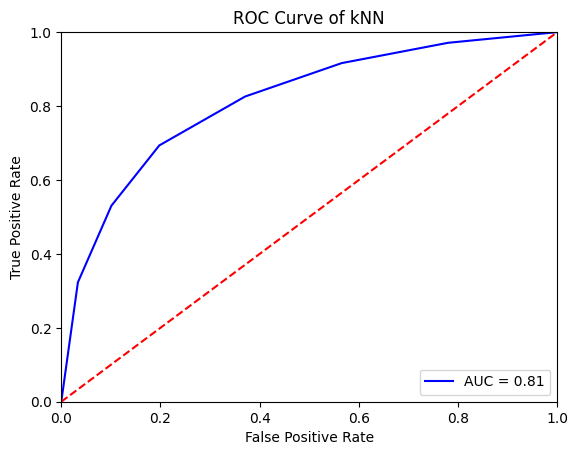

In [15]:
import pickle

with open('roc_curve_plot.pkl', 'rb') as file:
    fig = pickle.load(file)

# Get the axes from the figure
ax = fig.axes[0]

# Extract data from each line in the axes
lines = ax.get_lines()
for line in lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    label = line.get_label()
    print(f"Label: {label}")
    print(f"x_data: {x_data}")
    print(f"y_data: {y_data}")


plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (1, 2)

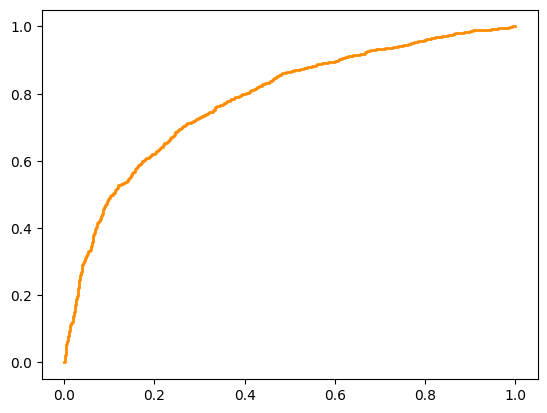

In [27]:
# Plot ROC curve
knn_x = [0,0.03352601, 0.10115607, 0.19768786, 0.37052023, 0.56531792, 0.77976879,1 ]
knn_y =  [0,0.32306964, 0.53055424, 0.69351018, 0.82567504, 0.91615348,0.97110374, 1]
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = 0.78))')
plt.plot(knn_x,knn_y, color='blue', lw=2, label='Neural Network (AUC = 0.81)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("combinedROC.pdf")
plt.show()